In [1]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

data = pd.read_csv("reddit_clean_data.csv")

/Users/pgalli/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
sia = SentimentIntensityAnalyzer()
def vader_sentiment(text):
    return round(sia.polarity_scores(str(text))["compound"], 3)

In [3]:
data["polarity"] = data["clean_post"].apply(vader_sentiment)

In [4]:
data.head(5)

,clean_post,polarity
0,recently went breakup said still wants friends...,-0.901
1,know navigate feelings new feeling stretch und...,-0.909
2,bf months already told depressed week nothing ...,-0.807
3,exhausted think finally rest think maybe thing...,-0.965
4,severly bullied since till resulted depressed ...,-0.875


In [5]:
def sentiment_level(score):
    if score < -0.05:
        return "Negative"
    elif score > 0.05:
        return "Positve"
    else:
        return "Neutral"

In [6]:
data["sentiment"] = data['polarity'].apply(sentiment_level)

In [7]:
data.head(5)

,clean_post,polarity,sentiment
0,recently went breakup said still wants friends...,-0.901,Negative
1,know navigate feelings new feeling stretch und...,-0.909,Negative
2,bf months already told depressed week nothing ...,-0.807,Negative
3,exhausted think finally rest think maybe thing...,-0.965,Negative
4,severly bullied since till resulted depressed ...,-0.875,Negative


In [8]:
data['sentiment'].value_counts()

sentiment
Negative    13203
Positve      6614
Neutral       546
Name: count, dtype: int64

Text(0, 0.5, 'Sentiment')

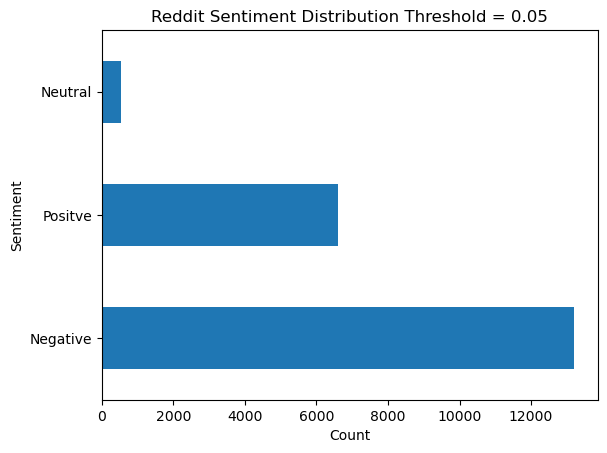

In [9]:
ax = data.sentiment.value_counts().plot(kind='barh')

ax.set_title("Reddit Sentiment Distribution Threshold = 0.05")
ax.set_xlabel("Count")
ax.set_ylabel("Sentiment")

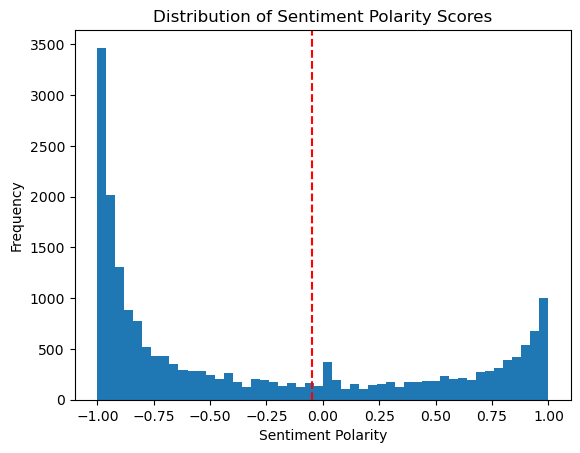

In [10]:
import matplotlib.pyplot as plt

plt.hist(data['polarity'], bins=50)
plt.axvline(-0.05, color='red', linestyle='--')
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Polarity Scores")
plt.show()

In [11]:
data['affect_label'] = (data['polarity'] <= -0.05).astype(int)

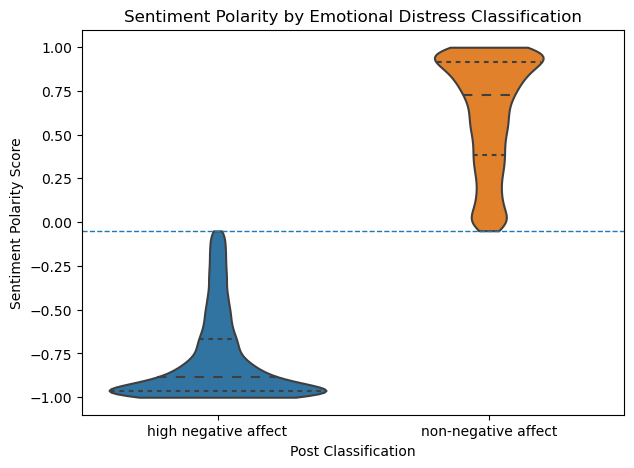

In [13]:
label_map = {0: 'non-negative affect', 1: 'high negative affect'}
data['label_name'] = data['affect_label'].map(label_map)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.violinplot(
    x='label_name',
    y='polarity',
    data=data,
    inner='quartile',
    cut=0
)

plt.axhline(-0.05, linestyle='--', linewidth=1)
plt.xlabel("Post Classification")
plt.ylabel("Sentiment Polarity Score")
plt.title("Sentiment Polarity by Emotional Distress Classification")
plt.show()

In [14]:
data.to_csv('reddit_data_full.csv', index=False)